In [1]:
from sklearn.datasets import load_boston
boston = load_boston()


In [2]:
print(boston.data.shape)

(506, 13)


In [3]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
import pandas as pd
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [7]:
bos['PRICE'] = boston.target
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

# Implemeanting SGD as Manually

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 5)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(354, 14)
(152, 14)
(354,)
(152,)


## Standardized Train And Test Data

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
additional_feature = np.ones(boston.data.shape[0])
feature_data = np.vstack((additional_feature,boston.data.T)).T
target_price = boston.target

In [39]:
weights = np.random.normal(0,1,feature_data.shape[1])
weights

array([-1.4522472 , -0.18272769, -1.43875141,  0.21879577,  0.92475086,
        0.55537352,  1.34210078,  0.27798195, -1.25128164, -1.11322182,
        0.11905563,  0.26463252, -0.60889841,  0.74154891])

In [40]:
#https://github.com/PushpendraSinghChauhan/SGD-Linear-Regression/blob/master/Implement%20Stochastic%20Gradient%20Descent%20on%20Linear%20Regression%20.ipynb
from numpy import random
temp_w = np.zeros(feature_data.shape[1])
r = 0.001
m = X_train.shape[0]
batch_size = 20
iterations = 800

random_ids = random.choice(m,m,replace=False)
X_shuffled = X_train[random_ids,:]
y_shuffled = Y_train[random_ids]
mini_batches = [(X_shuffled[i:i+batch_size,:], y_shuffled[i:i+batch_size])for i in range(0, m, batch_size)]


while(iterations >=0):
    for batch in mini_batches:
        X_batch = batch[0]
        Y_batch = batch[1]
        for j in range(0,feature_data.shape[1]):
            temp_sum = 0
            for i in range(0,X_batch.shape[0]):
                temp_sum += (( (np.sum( sc.inverse_transform(weights[1:14] * X_batch[i,1:])) + weights[0]*X_batch[i,0]) - Y_batch[i]) * X_batch[i,j])
            temp_w[j] = weights[j] - ((r/X_batch.shape[0])*temp_sum)
        weights = temp_w
    iterations -= 1 
    
manual_sgd_weights = weights

In [41]:
manual_sgd_predictions = np.zeros(X_test.shape[0])
for itr in range(0,X_test.shape[0]):
    manual_sgd_predictions[itr] = np.sum(sc.inverse_transform(weights[1:14]*X_test[itr,1:])) + weights[0]*X_test[itr,0]

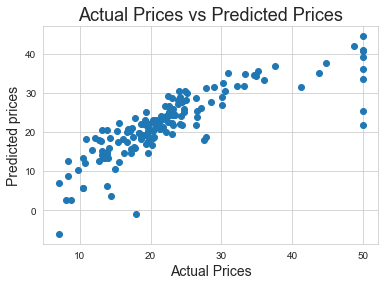

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(Y_test, manual_sgd_predictions)
plt.xlabel("Actual Prices",size=14)
plt.ylabel("Predicted prices",size=14)
plt.title("Actual Prices vs Predicted Prices",size=18)
plt.show()

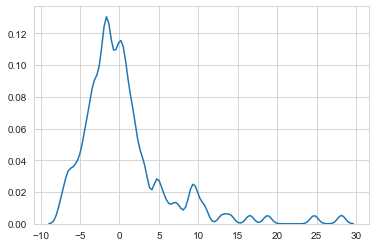

In [43]:
import seaborn as sns;
import numpy as np;
delta_y = Y_test - manual_sgd_predictions;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

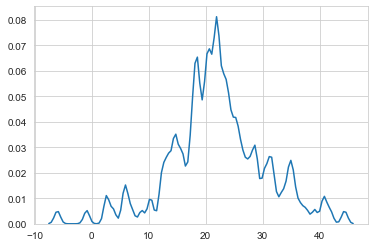

In [44]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(manual_sgd_predictions), bw=0.5)
plt.show()

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print("Mean Absolute Error: ",mean_absolute_error(Y_test, manual_sgd_predictions))
print("Mean Squared Error: ",mean_squared_error(Y_test, manual_sgd_predictions))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(Y_test,manual_sgd_predictions)))

Mean Absolute Error:  3.630548773840949
Mean Squared Error:  30.392535500638218
Root Mean Squared Error:  5.512942544652376


<h2>=======================================================================</h2>

# Implementing SGD Using Sklearn

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


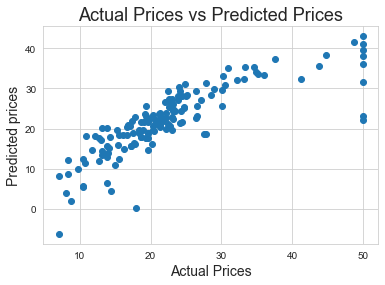

In [23]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(penalty='none', max_iter=800, learning_rate='constant' , eta0=0.001  )
sgd.fit(X_train, Y_train)

sklearn_sgd_predictions = sgd.predict(X_test)
sklearn_sgd_weights = sgd.coef_ 

plt.scatter(Y_test, sklearn_sgd_predictions)
plt.xlabel("Actual Prices",size=14)
plt.ylabel("Predicted prices",size=14)
plt.title("Actual Prices vs Predicted Prices",size=18)
plt.show()

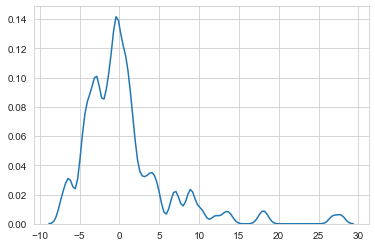

In [24]:
delta_y = Y_test - sklearn_sgd_predictions;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()

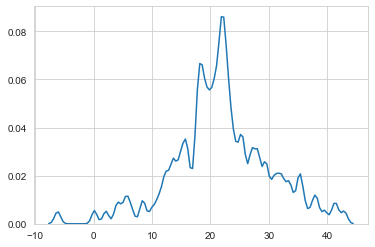

In [25]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(sklearn_sgd_predictions), bw=0.5)
plt.show()

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print("Mean Absolute Error ",mean_absolute_error(Y_test,sklearn_sgd_predictions))
print("Mean Squared Error ",mean_squared_error(Y_test, sklearn_sgd_predictions))
print("Root Mean Squared Error",np.sqrt(mean_squared_error(Y_test,sklearn_sgd_predictions)))

Mean Absolute Error  3.566466825082381
Mean Squared Error  30.733247135048398
Root Mean Squared Error 5.543757492445751


# Conclusion Table

In [46]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Set", "MAE", "RMSE"]

x.add_row(["SGD AS Manually", 3.6305, 5.5129])
x.add_row(["SGD Using SKlean", 3.566, 5.5437])
print(x)

+------------------+--------+--------+
|       Set        |  MAE   |  RMSE  |
+------------------+--------+--------+
| SGD AS Manually  | 3.6305 | 5.5129 |
| SGD Using SKlean | 3.566  | 5.5437 |
+------------------+--------+--------+


# Conclusion:-

1. First of all loaded boston dataset. then calculate featuresnames, decribation, and target .
2. Then did splited data into train and test data ans then did standardscaler and random normalization in it. and then Implement SGD as manually and calculated SGD Absolute Mean and RMSE.
3. Then plot scatterplot and pdf plot for it.
4. Then did SGD Using Sklearn and calculated SGD Absolute value and RMSE .
5. Then Plot scatter plot and pdf plot fot it .

<h2>========================================================================</h2>